# London: Demographic Custering vs Clustering by Venues

#### GitHub location: https://github.com/tbertoglia-ds/Coursera_Capstone/blob/master/London%20Boroughs%20Clustering.ipynb

### The Business Problem:
RightPlacer Inc. is a young Consulting Firm, specialized in helping investors setting up their business in the best location according to their needs.<br />
A team of Business consultants from RightPlacer Inc. has been requested to advise Mr. Johnson, an important client interested in setting-up an exclusive chain of Coffee Shops in London.<br />
Particularly, Mr. Johnson would like to know in which Boroughs should he place their Coffee Shops. <br />
Yet, the task is not that simple as he is pursuing two objectives simultaneously: guarantee business success of his chain and create a strong Brand, Top-of-mind within the high-end segment of customers.<br />
<br />
The three consultants are having problems reaching a consensus:<br />
-One of them suggests a demographic segmentation to focus on upscale neighborhoods with similar characteristics between them.<br />
-The second one proposes that they would do much better implementing segmentation by venues, to locate the coffee shops in those neighborhoods where people most often go for a Coffee.<br />
-The third one claims that any of these segmenting modalities would lead to a similar result and is indifferent to any of them.<br />
<br />
Finally, they agree to join efforts and try different strategies to analyze their results. <br />
How should they proceed?<br />
<br />

### The Data
Since the team of Business consultants agreed to try different strategies, we will use 3 sources of data: <br />
<br />
<b>a) Borroughs & Coordinates: <br /></b>
We will start by creating a base dataset containing the different borroughs of London, along with their geographic coordinates.<br />
To do this, we will scrap the corresponding website from Wikipedia using the <i>BeautifulSoup</i> package and prepare the data according to the format needed for this dataset.<br />
This dataset will be later used in the Clustering phase for the geographic location of the different Boroughs.<br />
<br />
The final dataset should have this format:<br />
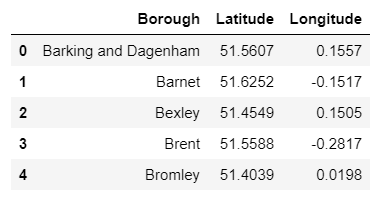<br />
Datasource url: 'https://en.wikipedia.org/wiki/List_of_London_boroughs' <br />
<br />

<b> b) Demographic Clustering: <br /></b>
Next, we will need to prepare a dataset appropriate to the clustering based on demographic profiling of London's boroughs.<br />
For this purpose, we will download a csv file from the official source and select the demographic features we will use for this clustering. <br />
The goal of this phase is to identify the Boroughs's clusters that better fit with the customer's profile that Mr. Johnson is trying to target. <br />
<br />
From the 81 available features, we chose the following as the most relevant for the demographic clustering required by our Stakeholder:<br />
-GLA_Population_Estimate_2017	<br />
-Population_density_(per_hectare)_2017	<br />
-Average_Age,_2017	<br />
-Employment_rate_(%)_(2015)	<br />
-Crime_rates_per_thousand_population_2014/15	<br />
-Median_House_Price,_2015	<br />
-Modelled_Household_median_income_estimates_2012/13 <br />
<br />
The dataset should look like this:<br />
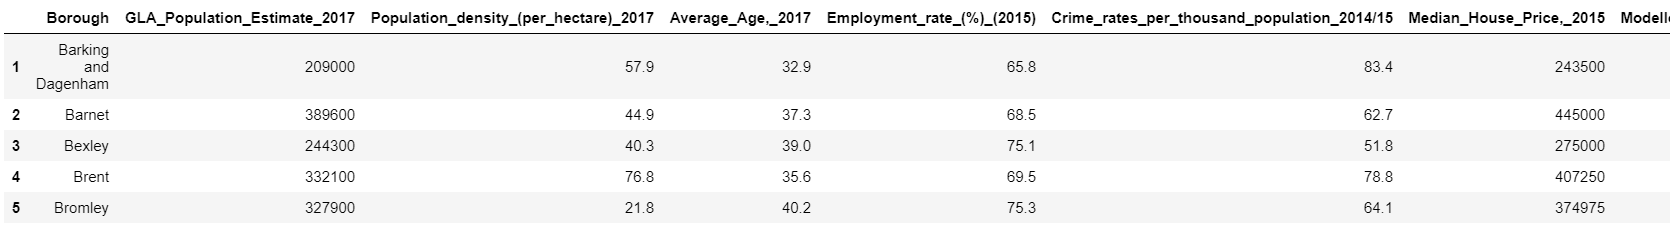<br />
As we are working with Features of differnt dimensions, the <i>StandardScaler</i> package will be used to normalize the data prior to the Clustering<br />

Datasource url: 'https://data.london.gov.uk/dataset/london-borough-profiles' <br />
 <br />

<b> c) Clustering by Venues: <br /></b>
In this section we will use the API of Foursquare, particularly the <i>Explore Endpoint</i> and prepare a parallel clustering. <br />
This time, based on the venue's configuration and their relevance in the different boroughs of London. <br />
The idea is to cluster the different Borroughs in regard to the Venues that are more often found in each of them. <br />
Ultimately, our intention here is to focus on Boroughs were customers normally go when looking for a Coffee Shop, as to guarantee the business success challenge presented by the Stakeholder.<br />
<br />Our Goal is to create a dataset like this:<br />
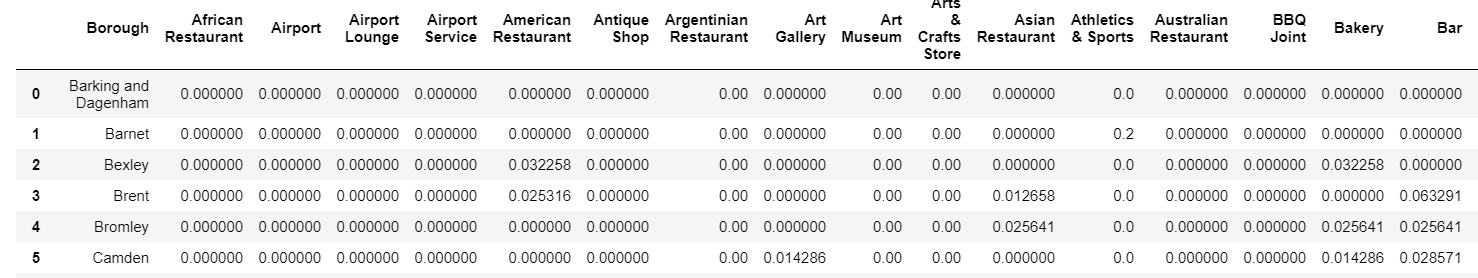<br />
Datasource url (API): 'https://api.foursquare.com/v2/venues/explore' <br />
<br />

#      
#      
# //////////////////////////////    Borrougs & Coordinates Dataset    //////////////////////////////
#      
#      

### 1. Import necessary Libraries

In [1]:
# Import Libraries

!pip install geopy

!pip install folium

!pip install geocoder

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import urllib.request

from bs4 import BeautifulSoup

print('Libraries imported.')

     |████████████████████████████████| 102kB 8.3MB/s ta 0:00:011
     |████████████████████████████████| 102kB 9.4MB/s ta 0:00:011
Libraries imported.


### 2. Download and Explore Demographic Data

In [2]:
#Specify URL
url = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'

In [3]:
#Open the url
page = urllib.request.urlopen(url).read().decode('utf-8-sig', errors="replace")

In [4]:
#Parse the HTML from our URL
soup = BeautifulSoup(page,'lxml')

In [5]:
#Explore Tables
all_tables=soup.find_all("table")
all_tables

[<table class="wikitable sortable" style="font-size:100%" width="100%">
 <tbody><tr>
 <th>Borough
 </th>
 <th>Inner
 </th>
 <th>Status
 </th>
 <th>Local authority
 </th>
 <th>Political control
 </th>
 <th>Headquarters
 </th>
 <th>Area (sq mi)
 </th>
 <th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
 </th>
 <th>Co-ordinates
 </th>
 <th><span style="background:#67BCD3"> Nr. in map </span>
 </th></tr>
 <tr>
 <td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
 </td>
 <td>
 </td>
 <td>
 </td>
 <td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
 </td>
 <td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
 </td>
 <td><a href="/wiki/Barking_Town_Hall" 

In [6]:
#Explore 'wikitable sortable'
right_table=soup.find('table', class_='wikitable sortable')
right_table

<table class="wikitable sortable" style="font-size:100%" width="100%">
<tbody><tr>
<th>Borough
</th>
<th>Inner
</th>
<th>Status
</th>
<th>Local authority
</th>
<th>Political control
</th>
<th>Headquarters
</th>
<th>Area (sq mi)
</th>
<th>Population (2013 est)<sup class="reference" id="cite_ref-1"><a href="#cite_note-1">[1]</a></sup>
</th>
<th>Co-ordinates
</th>
<th><span style="background:#67BCD3"> Nr. in map </span>
</th></tr>
<tr>
<td><a href="/wiki/London_Borough_of_Barking_and_Dagenham" title="London Borough of Barking and Dagenham">Barking and Dagenham</a> <sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[note 1]</a></sup>
</td>
<td>
</td>
<td>
</td>
<td><a href="/wiki/Barking_and_Dagenham_London_Borough_Council" title="Barking and Dagenham London Borough Council">Barking and Dagenham London Borough Council</a>
</td>
<td><a href="/wiki/Labour_Party_(UK)" title="Labour Party (UK)">Labour</a>
</td>
<td><a href="/wiki/Barking_Town_Hall" title="Barking Town Hall">Town Hal

### 3. Arrange and create Dataset

In [7]:
# Loop through the rows
A=[]
B=[]


for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells) > 0:
        A.append(cells[0].text.strip())
        B.append(cells[8].text.strip()) 
   

In [8]:
#Create Dataframe
df_pre=pd.DataFrame(A,columns=['Borough'])
df_pre['Co-ordinates']=B
print(df_pre.shape)
df_pre.head()

(32, 2)


,Borough,Co-ordinates
0,Barking and Dagenham [note 1],51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


### 4. After checkig the data, I decided to extract all location & Neighborhood data from third column
#### I will create 3 strings and will join them afterwards in an new dataset.

In [9]:
s = df_pre['Co-ordinates'].str.split(" / ", expand=True)
s.head()

,0,1,2
0,51°33′39″N 0°09′21″E﻿,﻿51.5607°N 0.1557°E﻿,51.5607; 0.1557﻿ (Barking and Dagenham)
1,51°37′31″N 0°09′06″W﻿,﻿51.6252°N 0.1517°W﻿,51.6252; -0.1517﻿ (Barnet)
2,51°27′18″N 0°09′02″E﻿,﻿51.4549°N 0.1505°E﻿,51.4549; 0.1505﻿ (Bexley)
3,51°33′32″N 0°16′54″W﻿,﻿51.5588°N 0.2817°W﻿,51.5588; -0.2817﻿ (Brent)
4,51°24′14″N 0°01′11″E﻿,﻿51.4039°N 0.0198°E﻿,51.4039; 0.0198﻿ (Bromley)


In [10]:
s2 = s[2]
s2.head()

0    51.5607; 0.1557﻿ (Barking and Dagenham)
1                 51.6252; -0.1517﻿ (Barnet)
2                  51.4549; 0.1505﻿ (Bexley)
3                  51.5588; -0.2817﻿ (Brent)
4                 51.4039; 0.0198﻿ (Bromley)
Name: 2, dtype: object

In [11]:
s3 = s2.str.split("; ", expand=True)
s3.head()

,0,1
0,51.5607,0.1557﻿ (Barking and Dagenham)
1,51.6252,-0.1517﻿ (Barnet)
2,51.4549,0.1505﻿ (Bexley)
3,51.5588,-0.2817﻿ (Brent)
4,51.4039,0.0198﻿ (Bromley)


#### Latitude ready

In [12]:
lat = s3[0]
lat = lat.apply(pd.to_numeric, errors='coerce')
lat.head()

0    51.5607
1    51.6252
2    51.4549
3    51.5588
4    51.4039
Name: 0, dtype: float64

In [13]:
s4 = s3[1].str.split('(', expand=True)
s4.head()

,0,1
0,0.1557﻿,Barking and Dagenham)
1,-0.1517﻿,Barnet)
2,0.1505﻿,Bexley)
3,-0.2817﻿,Brent)
4,0.0198﻿,Bromley)


In [14]:
s4_pre = s4[0]
s4_pre.head()

0     0.1557﻿ 
1    -0.1517﻿ 
2     0.1505﻿ 
3    -0.2817﻿ 
4     0.0198﻿ 
Name: 0, dtype: object

In [15]:
s4_pre2 =  s4_pre.str.split('\ufeff', expand=True)
s4_pre2.head()

,0,1
0,0.1557,
1,-0.1517,
2,0.1505,
3,-0.2817,
4,0.0198,


In [16]:
lon = s4_pre2[0]
lon.head()

0     0.1557
1    -0.1517
2     0.1505
3    -0.2817
4     0.0198
Name: 0, dtype: object

#### Longitude ready

In [17]:
lon = lon.apply(pd.to_numeric, errors='coerce')
lon.head()

0    0.1557
1   -0.1517
2    0.1505
3   -0.2817
4    0.0198
Name: 0, dtype: float64

In [18]:
s5 = s4[1]
s5.head()

0    Barking and Dagenham)
1                  Barnet)
2                  Bexley)
3                   Brent)
4                 Bromley)
Name: 1, dtype: object

In [19]:
#Since strings are immutables, we separate the column with the "("
s6 = s5.str.split(")", expand=True)
s6.head()

,0,1
0,Barking and Dagenham,
1,Barnet,
2,Bexley,
3,Brent,
4,Bromley,


#### Borrough ready

In [20]:
bor = s6[0]
bor.head()

0    Barking and Dagenham
1                  Barnet
2                  Bexley
3                   Brent
4                 Bromley
Name: 0, dtype: object

### 5. Let's create our Borrough & Location Dataframe

In [21]:
df = pd.DataFrame() 

In [22]:
df['Borough'] = bor

In [23]:
df['Latitude'] = lat

In [24]:
df['Longitude'] = lon

In [25]:
print(df.shape)
df.head()

(32, 3)


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [26]:
#Trim Dataset

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [27]:
print(df.shape)
print(df.dtypes)
df.head()

(32, 3)
Borough       object
Latitude     float64
Longitude    float64
dtype: object


,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


#      
#      
# ///////////////////////////////     Demographic Clustering     //////////////////////////////
#      
#      

### 6. Now we collect demographic data from the official source

In [28]:
#https://data.london.gov.uk/dataset/london-borough-profiles
df_dem_pre = pd.read_csv('https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv', header = 0, encoding= 'unicode_escape')
df_dem_pre.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015","Proportion_of_population_aged_65_and_over,_2015",Net_internal_migration_(2015),Net_international_migration_(2015),Net_natural_change_(2015),%_of_resident_population_born_abroad_(2015),Largest_migrant_population_by_country_of_birth_(2011),%_of_largest_migrant_population_(2011),Second_largest_migrant_population_by_country_of_birth_(2011),%_of_second_largest_migrant_population_(2011),Third_largest_migrant_population_by_country_of_birth_(2011),%_of_third_largest_migrant_population_(2011),%_of_population_from_BAME_groups_(2016),%_people_aged_3+_whose_main_language_is_not_English_(2011_Census),"Overseas_nationals_entering_the_UK_(NINo),_(2015/16)","New_migrant_(NINo)_rates,_(2015/16)",Largest_migrant_population_arrived_during_2015/16,Second_largest_migrant_population_arrived_during_2015/16,Third_largest_migrant_population_arrived_during_2015/16,Employment_rate_(%)_(2015),Male_employment_rate_(2015),Female_employment_rate_(2015),Unemployment_rate_(2015),Youth_Unemployment_(claimant)_rate_18-24_(Dec-15),Proportion_of_16-18_year_olds_who_are_NEET_(%)_(2014),Proportion_of_the_working-age_population_who_claim_out-of-work_benefits_(%)_(May-2016),%_working-age_with_a_disability_(2015),Proportion_of_working_age_people_with_no_qualifications_(%)_2015,Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015,"Gross_Annual_Pay,_(2016)",Gross_Annual_Pay_-_Male_(2016),Gross_Annual_Pay_-_Female_(2016),Modelled_Household_median_income_estimates_2012/13,%_adults_that_volunteered_in_past_12_months_(2010/11_to_2012/13),Number_of_jobs_by_workplace_(2014),%_of_employment_that_is_in_public_sector_(2014),"Jobs_Density,_2015","Number_of_active_businesses,_2015",Two-year_business_survival_rates_(started_in_2013),Crime_rates_per_thousand_population_2014/15,Fires_per_thousand_population_(2014),Ambulance_incidents_per_hundred_population_(2014),"Median_House_Price,_2015","Average_Band_D_Council_Tax_charge_(£),_2015/16",New_Homes_(net)_2015/16_(provisional),"Homes_Owned_outright,_(2014)_%","Being_bought_with_mortgage_or_loan,_(2014)_%","Rented_from_Local_Authority_or_Housing_Association,_(2014)_%","Rented_from_Private_landlord,_(2014)_%","%_of_area_that_is_Greenspace,_2005",Total_carbon_emissions_(2014),"Household_Waste_Recycling_Rate,_2014/15","Number_of_cars,_(2011_Census)","Number_of_cars_per_household,_(2011_Census)","%_of_adults_who_cycle_at_least_once_per_month,_2014/15","Average_Public_Transport_Accessibility_score,_2014","Achievement_of_5_or_more_A*-_C_grades_at_GCSE_or_equivalent_including_English_and_Maths,_2013/14",Rates_of_Children_Looked_After_(2016),%_of_pupils_whose_first_language_is_not_English_(2015),%_children_living_in_out-of-work_households_(2015),"Male_life_expectancy,_(2012-14)","Female_life_expectancy,_(2012-14)",Teenage_conception_rate_(2014),Life_satisfaction_score_2011-14_(out_of_10),Worthwhileness_score_2011-14_(out_of_10),Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,15.5,-7,665,30,.,United States,2.8,France,2,Australia,1.9,27.5,17.1,975,152.2,India,France,United States,64.6,.,.,.,1.6,.,3.4,.,.,.,.,.,.,"£63,620",.,500400,3.4,84.3,26130,64.3,.,12.3,.,799999,931.2,80,.,.,.,.,4.8,1036,34.4,1692,0.4,16.9,7.9,78.6,101,.,7.9,.,.,.,6.6,7.1,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,

#### Now I will create a subset with the Key Deographic Features I wwant to use for clustering

In [29]:
df_dem = df_dem_pre.iloc[1:33,[1, 3, 6, 7, 28, 48, 51, 41]]  
df_dem.head()

,Area_name,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
1,Barking and Dagenham,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
2,Barnet,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,Bexley,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,Brent,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
5,Bromley,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


In [30]:
#Trim Dataset

df_dem = df_dem.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [31]:
df_dem.rename(columns={'Area_name': 'Borough'}, inplace=True)
print(df_dem.shape)
df_dem.head()

(32, 8)


,Borough,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
1,Barking and Dagenham,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
2,Barnet,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,Bexley,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,Brent,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
5,Bromley,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


### 7. Normalize Dataset

Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally. We use StandardScaler() to normalize our dataset.

In [32]:
df_dem_clusterset_pre = df_dem.drop('Borough', 1)
df_dem_clusterset_pre.head()

,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
1,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
2,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
5,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


#### Format and add 'Modelled_Household_median_income_estimates_2012/13'

In [33]:
df_incc = df_dem_clusterset_pre['Modelled_Household_median_income_estimates_2012/13']
df_incc = df_incc.str.split("£", expand=True)
df_incc = df_incc.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_incc = df_incc[1]
#df_incc = df_incc.str.split(",", expand=True)
df_incc = df_incc.str.split(",", expand=True)
df_incc[2] =  df_incc[0] + df_incc[1]
df_incc = df_incc[2]
df_incc = df_incc.apply(pd.to_numeric, errors='coerce')
df_incc

1     29420
2     40530
3     36990
4     32140
5     43060
6     43750
7     37000
8     36070
9     33110
10    35350
11    35140
12    43820
13    35420
14    38880
15    36670
16    37040
17    35330
18    39790
19    55620
20    43940
21    38490
22    35900
23    41960
24    28780
25    36860
26    53470
27    37100
28    39940
29    34930
30    33080
31    47480
32    47510
Name: 2, dtype: int64

In [34]:
df_dem_clusterset_pre['Modelled_Household_median_income_estimates_2012/13'] = df_incc
df_dem_clusterset_pre

,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
1,209000,57.9,32.9,65.8,83.4,243500,29420
2,389600,44.9,37.3,68.5,62.7,445000,40530
3,244300,40.3,39.0,75.1,51.8,275000,36990
4,332100,76.8,35.6,69.5,78.8,407250,32140
5,327900,21.8,40.2,75.3,64.1,374975,43060
6,242500,111.3,36.4,69.2,123.5,700000,43750
7,386500,44.7,37.0,75.4,77,300000,37000
8,351600,63.3,36.2,72.7,75.5,430000,36070
9,333000,41.2,36.3,73.0,69.4,320000,33110
10,280100,59.2,35.0,72.1,79.4,340000,35350


In [35]:
from sklearn.preprocessing import StandardScaler

X = df_dem_clusterset_pre.values[:,1:]
X = np.nan_to_num(X)
df_dem_clusterset = StandardScaler().fit_transform(X)
df_dem_clusterset

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-4.65378203e-01, -1.50670843e+00, -1.81033090e+00,
        -4.79371558e-02, -1.08283748e+00, -1.57543787e+00],
       [-8.02303598e-01,  5.25327460e-01, -1.12849747e+00,
        -7.23545071e-01, -5.12656637e-02,  2.72283146e-01],
       [-9.21523354e-01,  1.31043224e+00,  5.38206484e-01,
        -1.07929996e+00, -9.21574394e-01, -3.16459644e-01],
       [ 2.44594879e-02, -2.59777316e-01, -8.75966564e-01,
        -1.98072248e-01, -2.44525396e-01, -1.12307053e+00],
       [-1.40099411e+00,  1.86462384e+00,  5.88712664e-01,
        -6.77851782e-01, -4.09756068e-01,  6.93051299e-01],
       [ 9.18607653e-01,  1.09683755e-01, -9.51725835e-01,
         1.26084919e+00,  1.25419743e+00,  8.07806249e-01],
       [-8.07487066e-01,  3.86779559e-01,  6.13965754e-01,
        -2.56820762e-01, -7.93587816e-01, -3.14796529e-01],
       [-3.25424577e-01,  1.73184877e-02, -6.78676798e-02,
        -3.05777858e-01, -1.28057610e-01, -4.69466245e-01],
       [-8.98197749e-01,  6.35011216e-02,  7.891

### 8. We proceed clustering the Boroughs according to their Demographic charcteristics

In [36]:
# set number of clusters
kclusters = 5

#df_dem_clustering = df_dem.drop('Borough', 1)

# run k-means clustering
kmeans_dem = KMeans(n_clusters=kclusters, random_state=0).fit(df_dem_clusterset)

# check cluster labels generated for each row in the dataframe
kmeans_dem.labels_[0:10] 

array([2, 1, 3, 1, 3, 0, 1, 1, 1, 1], dtype=int32)

### 9. Now we join the Location with the Demographic Dataset

In [37]:
# add clustering labels
df_dem.insert(0, 'Cluster Labels', kmeans_dem.labels_)

london_merged = df

london_merged.head()

,Borough,Latitude,Longitude
0,Barking and Dagenham,51.5607,0.1557
1,Barnet,51.6252,-0.1517
2,Bexley,51.4549,0.1505
3,Brent,51.5588,-0.2817
4,Bromley,51.4039,0.0198


In [38]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(df_dem.set_index('Borough'), on='Borough')

london_merged.head() # check the last columns!

,Borough,Latitude,Longitude,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
0,Barking and Dagenham,51.5607,0.1557,2,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
1,Barnet,51.6252,-0.1517,1,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
2,Bexley,51.4549,0.1505,3,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
3,Brent,51.5588,-0.2817,1,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
4,Bromley,51.4039,0.0198,3,327900,21.8,40.2,75.3,64.1,374975,"£43,060"


### 10. We are now ready to map the demographic's clustering result

In [39]:
address = 'London'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [40]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [41]:
# create map of London & Clustered Neighborhoods
import folium
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 11. Examine Clusters

In [42]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
5,Camden,0,242500,111.3,36.4,69.2,123.5,700000,"£43,750"
11,Hammersmith and Fulham,0,185300,113,35.7,77.5,113.2,730000,"£43,820"
17,Islington,0,231200,155.6,34.8,72.6,121.2,583000,"£39,790"
20,Lambeth,0,328900,122.7,34.5,78.5,104.6,450000,"£38,490"
26,Southwark,0,314300,108.9,34.4,74.2,100.6,475000,"£37,100"
30,Wandsworth,0,321000,93.7,35.0,78.8,72.6,557000,"£47,480"


In [43]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
1,Barnet,1,389600,44.9,37.3,68.5,62.7,445000,"£40,530"
3,Brent,1,332100,76.8,35.6,69.5,78.8,407250,"£32,140"
6,Croydon,1,386500,44.7,37.0,75.4,77,300000,"£37,000"
7,Ealing,1,351600,63.3,36.2,72.7,75.5,430000,"£36,070"
8,Enfield,1,333000,41.2,36.3,73.0,69.4,320000,"£33,110"
9,Greenwich,1,280100,59.2,35.0,72.1,79.4,340000,"£35,350"
12,Haringey,1,278000,93.9,35.1,71.3,90.2,432500,"£35,420"
15,Hillingdon,1,301000,26,36.4,73.2,76.6,350000,"£37,040"
16,Hounslow,1,274200,49,35.8,74.2,79.2,355000,"£35,330"
21,Lewisham,1,303400,86.3,35.0,75.9,77,352000,"£35,900"


In [44]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
0,Barking and Dagenham,2,209000,57.9,32.9,65.8,83.4,243500,"£29,420"
10,Hackney,2,274300,144,33.1,69.0,99.6,485000,"£35,140"
23,Newham,2,342900,94.7,32.1,66.2,90.8,305000,"£28,780"
28,Tower Hamlets,2,304000,153.7,31.4,70.4,99.9,415000,"£34,930"


In [45]:
london_merged.loc[london_merged['Cluster Labels'] == 3, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
2,Bexley,3,244300,40.3,39.0,75.1,51.8,275000,"£36,990"
4,Bromley,3,327900,21.8,40.2,75.3,64.1,374975,"£43,060"
13,Harrow,3,252300,50,38.3,73.9,50.4,396150,"£38,880"
14,Havering,3,254300,22.6,40.3,76.5,62.9,287500,"£36,670"
19,Kingston upon Thames,3,175400,47.1,37.1,74.4,58.5,410000,"£43,940"
22,Merton,3,208100,55.3,36.7,78.8,59.7,415000,"£41,960"
25,Richmond upon Thames,3,197300,34.4,38.8,79.6,56.3,575000,"£53,470"
27,Sutton,3,202600,46.2,38.9,78.2,55.9,320000,"£39,940"


In [46]:
london_merged.loc[london_merged['Cluster Labels'] == 4, london_merged.columns[[0,3] + list(range(4, london_merged.shape[1]))]]

,Borough,Cluster Labels,GLA_Population_Estimate_2017,Population_density_(per_hectare)_2017,"Average_Age,_2017",Employment_rate_(%)_(2015),Crime_rates_per_thousand_population_2014/15,"Median_House_Price,_2015",Modelled_Household_median_income_estimates_2012/13
18,Kensington and Chelsea,4,159000,131.1,39.3,68.2,120.9,1200000,"£55,620"
31,Westminster,4,242100,112.7,37.7,65.6,212.4,920000,"£47,510"


#      
#      
# //////////////////////////////     Clustering by Venues    //////////////////////////////
#      
#      

### 12. Foursquare Keys

In [47]:
# The code was removed by Watson Studio for sharing.

### 13. Explore London's Neighborhoods

In [48]:
radius = 500
LIMIT = 100

In [49]:

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
# type your answer here

london_venues = getNearbyVenues(names=london_merged['Borough'],
                                   latitudes=london_merged['Latitude'],
                                   longitudes=london_merged['Longitude']
                               )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney


In [ ]:
print(london_venues.shape)
london_venues.head()

In [ ]:
london_venues.groupby('Borough').count()

In [61]:
uv = np.unique(london_venues['Venue'])
uv

array(['"Out of Order" David Mach Sculpture (Phoneboxes)',
       '1Rebel Victoria', '41 Hotel', ..., 'truGym', 'wagamama', 'wilko'],
      dtype=object)

In [62]:
print('There are {} uniques categories'.format(len(london_venues['Venue Category'].unique())) + 
      ' and {} uniques Venues.'.format(len(london_venues['Venue'].unique())))

There are 215 uniques categories and 1043 uniques Venues.


### 14. Neighborhoods Analysis

In [68]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = london_venues['Borough'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head(100)

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Turkish Restaurant,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [69]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Turkish Restaurant,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.

In [70]:
london_grouped_sum = london_onehot.groupby('Borough').sum().reset_index()
london_grouped_sum

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Boarding House,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Chaat Place,Champagne Bar,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,English Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Flea Market,Food Court,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kebab Restaurant,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Movie Theater,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Okonomiyaki Restaurant,Optical Shop,Organic Grocery,Outdoor Event Space,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pharmacy,Pizza Place,Platform,Playground,Plaza,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Rafting,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Turkish Restaurant,Used Bookstore,Vape Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Barnet,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [71]:
london_grouped.shape

(32, 216)

### 15. London's neighborhoods along with their top 5 most common venues

In [72]:
num_top_venues = 5

for Borough in london_grouped['Borough']:
    print("----"+Borough+"----")
    temp = london_grouped[london_grouped['Borough'] == Borough].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0  Gym / Fitness Center  0.14
1           Bus Station  0.14
2                  Pool  0.14
3           Supermarket  0.14
4                  Park  0.14


----Barnet----
                venue  freq
0                Café   0.4
1            Bus Stop   0.2
2    Business Service   0.2
3  Athletics & Sports   0.2
4  African Restaurant   0.0


----Bexley----
                venue  freq
0      Clothing Store  0.10
1                 Pub  0.10
2         Coffee Shop  0.10
3         Supermarket  0.06
4  Italian Restaurant  0.06


----Brent----
                 venue  freq
0                Hotel  0.09
1          Coffee Shop  0.09
2                  Bar  0.06
3  Sporting Goods Shop  0.05
4       Clothing Store  0.05


----Bromley----
                  venue  freq
0        Clothing Store  0.15
1           Coffee Shop  0.13
2          Burger Joint  0.05
3  Gym / Fitness Center  0.05
4           Pizza Place  0.05


----Camden----
          venue 

### 16. Build a Dataframe

In [73]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [74]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
borough_venues_sorted = pd.DataFrame(columns=columns)
borough_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    borough_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

borough_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Bus Station,Supermarket,Park,Martial Arts Dojo,Gym / Fitness Center,Golf Course,Electronics Store,Fish & Chips Shop,Film Studio
1,Barnet,Café,Bus Stop,Business Service,Athletics & Sports,Yoga Studio,Falafel Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop
2,Bexley,Coffee Shop,Clothing Store,Pub,Pharmacy,Supermarket,Fast Food Restaurant,Italian Restaurant,Plaza,Portuguese Restaurant,Fish & Chips Shop
3,Brent,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Sandwich Place,Grocery Store,Food Court,Indian Restaurant,Shoe Store
4,Bromley,Clothing Store,Coffee Shop,Burger Joint,Gym / Fitness Center,Pizza Place,Donut Shop,Fast Food Restaurant,Stationery Store,Bookstore,Furniture / Home Store


### 17. Cluster Neighborhoods by venues

In [75]:
# set number of clusters
kclusters = 5

london_grouped_clustering = london_grouped.drop('Borough', 1)

# run k-means clustering
kmeans_venues = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_venues.labels_[0:10] 

array([3, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [76]:
borough_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Pool,Bus Station,Supermarket,Park,Martial Arts Dojo,Gym / Fitness Center,Golf Course,Electronics Store,Fish & Chips Shop,Film Studio
1,Barnet,Café,Bus Stop,Business Service,Athletics & Sports,Yoga Studio,Falafel Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop
2,Bexley,Coffee Shop,Clothing Store,Pub,Pharmacy,Supermarket,Fast Food Restaurant,Italian Restaurant,Plaza,Portuguese Restaurant,Fish & Chips Shop
3,Brent,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Sandwich Place,Grocery Store,Food Court,Indian Restaurant,Shoe Store
4,Bromley,Clothing Store,Coffee Shop,Burger Joint,Gym / Fitness Center,Pizza Place,Donut Shop,Fast Food Restaurant,Stationery Store,Bookstore,Furniture / Home Store
5,Camden,Coffee Shop,Café,Hotel,Pub,Burger Joint,Pizza Place,Train Station,Breakfast Spot,Garden,Italian Restaurant
6,Croydon,Coffee Shop,Pub,Portuguese Restaurant,Museum,Supermarket,Gaming Cafe,Bookstore,Breakfast Spot,Spanish Restaurant,Brewery
7,Ealing,Coffee Shop,Clothing Store,Park,Bakery,Pub,Café,Pizza Place,Hotel,Burger Joint,Vietnamese Restaurant
8,Enfield,Clothing Store,Coffee Shop,Café,Optical Shop,Pub,Supermarket,Pharmacy,Department Store,Shopping Mall,Gift Shop
9,Greenwich,Pub,Fast Food Restaurant,Coffee Shop,Supermarket,Clothing Store,Plaza,Grocery Store,Pharmacy,Hotel,Bookstore


In [77]:
# add clustering labels
borough_venues_sorted.insert(0, 'Cluster Labels', kmeans_venues.labels_)



In [78]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
london_merged_venue = df.join(borough_venues_sorted.set_index('Borough'), on='Borough')

london_merged_venue.head() # check the last columns!

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5607,0.1557,3,Pool,Bus Station,Supermarket,Park,Martial Arts Dojo,Gym / Fitness Center,Golf Course,Electronics Store,Fish & Chips Shop,Film Studio
1,Barnet,51.6252,-0.1517,2,Café,Bus Stop,Business Service,Athletics & Sports,Yoga Studio,Falafel Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop
2,Bexley,51.4549,0.1505,1,Coffee Shop,Clothing Store,Pub,Pharmacy,Supermarket,Fast Food Restaurant,Italian Restaurant,Plaza,Portuguese Restaurant,Fish & Chips Shop
3,Brent,51.5588,-0.2817,1,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Sandwich Place,Grocery Store,Food Court,Indian Restaurant,Shoe Store
4,Bromley,51.4039,0.0198,1,Clothing Store,Coffee Shop,Burger Joint,Gym / Fitness Center,Pizza Place,Donut Shop,Fast Food Restaurant,Stationery Store,Bookstore,Furniture / Home Store


In [79]:
london_merged_venue

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5607,0.1557,3,Pool,Bus Station,Supermarket,Park,Martial Arts Dojo,Gym / Fitness Center,Golf Course,Electronics Store,Fish & Chips Shop,Film Studio
1,Barnet,51.6252,-0.1517,2,Café,Bus Stop,Business Service,Athletics & Sports,Yoga Studio,Falafel Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop
2,Bexley,51.4549,0.1505,1,Coffee Shop,Clothing Store,Pub,Pharmacy,Supermarket,Fast Food Restaurant,Italian Restaurant,Plaza,Portuguese Restaurant,Fish & Chips Shop
3,Brent,51.5588,-0.2817,1,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Sandwich Place,Grocery Store,Food Court,Indian Restaurant,Shoe Store
4,Bromley,51.4039,0.0198,1,Clothing Store,Coffee Shop,Burger Joint,Gym / Fitness Center,Pizza Place,Donut Shop,Fast Food Restaurant,Stationery Store,Bookstore,Furniture / Home Store
5,Camden,51.5290,-0.1255,1,Coffee Shop,Café,Hotel,Pub,Burger Joint,Pizza Place,Train Station,Breakfast Spot,Garden,Italian Restaurant
6,Croydon,51.3714,-0.0977,1,Coffee Shop,Pub,Portuguese Restaurant,Museum,Supermarket,Gaming Cafe,Bookstore,Breakfast Spot,Spanish Restaurant,Brewery
7,Ealing,51.5130,-0.3089,1,Coffee Shop,Clothing Store,Park,Bakery,Pub,Café,Pizza Place,Hotel,Burger Joint,Vietnamese Restaurant
8,Enfield,51.6538,-0.0799,1,Clothing Store,Coffee Shop,Café,Optical Shop,Pub,Supermarket,Pharmacy,Department Store,Shopping Mall,Gift Shop
9,Greenwich,51.4892,0.0648,1,Pub,Fast Food Restaurant,Coffee Shop,Supermarket,Clothing Store,Plaza,Grocery Store,Pharmacy,Hotel,Bookstore


#### As there is nom info for 'City of London' we replace the Cluster Label with the mean of Boroughs

In [80]:
london_merged_venue = london_merged_venue.fillna(london_merged_venue.mean())
london_merged_venue

,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,51.5607,0.1557,3,Pool,Bus Station,Supermarket,Park,Martial Arts Dojo,Gym / Fitness Center,Golf Course,Electronics Store,Fish & Chips Shop,Film Studio
1,Barnet,51.6252,-0.1517,2,Café,Bus Stop,Business Service,Athletics & Sports,Yoga Studio,Falafel Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop
2,Bexley,51.4549,0.1505,1,Coffee Shop,Clothing Store,Pub,Pharmacy,Supermarket,Fast Food Restaurant,Italian Restaurant,Plaza,Portuguese Restaurant,Fish & Chips Shop
3,Brent,51.5588,-0.2817,1,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Sandwich Place,Grocery Store,Food Court,Indian Restaurant,Shoe Store
4,Bromley,51.4039,0.0198,1,Clothing Store,Coffee Shop,Burger Joint,Gym / Fitness Center,Pizza Place,Donut Shop,Fast Food Restaurant,Stationery Store,Bookstore,Furniture / Home Store
5,Camden,51.5290,-0.1255,1,Coffee Shop,Café,Hotel,Pub,Burger Joint,Pizza Place,Train Station,Breakfast Spot,Garden,Italian Restaurant
6,Croydon,51.3714,-0.0977,1,Coffee Shop,Pub,Portuguese Restaurant,Museum,Supermarket,Gaming Cafe,Bookstore,Breakfast Spot,Spanish Restaurant,Brewery
7,Ealing,51.5130,-0.3089,1,Coffee Shop,Clothing Store,Park,Bakery,Pub,Café,Pizza Place,Hotel,Burger Joint,Vietnamese Restaurant
8,Enfield,51.6538,-0.0799,1,Clothing Store,Coffee Shop,Café,Optical Shop,Pub,Supermarket,Pharmacy,Department Store,Shopping Mall,Gift Shop
9,Greenwich,51.4892,0.0648,1,Pub,Fast Food Restaurant,Coffee Shop,Supermarket,Clothing Store,Plaza,Grocery Store,Pharmacy,Hotel,Bookstore


In [81]:
london_merged_venue[['Cluster Labels']] = london_merged_venue[['Cluster Labels']].astype(int)

In [82]:
london_merged_venue.dtypes

Borough                    object
Latitude                  float64
Longitude                 float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

### 18. Map London's Clusters

In [83]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged_venue['Latitude'], london_merged_venue['Longitude'], london_merged_venue['Borough'], london_merged_venue['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 19. Examine Clusters

In [84]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 0, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,0,Pizza Place,Park,Café,Bed & Breakfast,Yoga Studio,English Restaurant,Flea Market,Fish Market,Fish & Chips Shop,Film Studio


In [85]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 1, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,1,Coffee Shop,Clothing Store,Pub,Pharmacy,Supermarket,Fast Food Restaurant,Italian Restaurant,Plaza,Portuguese Restaurant,Fish & Chips Shop
3,Brent,1,Coffee Shop,Hotel,Bar,Sporting Goods Shop,Clothing Store,Sandwich Place,Grocery Store,Food Court,Indian Restaurant,Shoe Store
4,Bromley,1,Clothing Store,Coffee Shop,Burger Joint,Gym / Fitness Center,Pizza Place,Donut Shop,Fast Food Restaurant,Stationery Store,Bookstore,Furniture / Home Store
5,Camden,1,Coffee Shop,Café,Hotel,Pub,Burger Joint,Pizza Place,Train Station,Breakfast Spot,Garden,Italian Restaurant
6,Croydon,1,Coffee Shop,Pub,Portuguese Restaurant,Museum,Supermarket,Gaming Cafe,Bookstore,Breakfast Spot,Spanish Restaurant,Brewery
7,Ealing,1,Coffee Shop,Clothing Store,Park,Bakery,Pub,Café,Pizza Place,Hotel,Burger Joint,Vietnamese Restaurant
8,Enfield,1,Clothing Store,Coffee Shop,Café,Optical Shop,Pub,Supermarket,Pharmacy,Department Store,Shopping Mall,Gift Shop
9,Greenwich,1,Pub,Fast Food Restaurant,Coffee Shop,Supermarket,Clothing Store,Plaza,Grocery Store,Pharmacy,Hotel,Bookstore
10,Hackney,1,Pub,Coffee Shop,Brewery,Bakery,Café,Grocery Store,Modern European Restaurant,Bus Stop,Clothing Store,Vegetarian / Vegan Restaurant
11,Hammersmith and Fulham,1,Pub,Café,Hotel,Italian Restaurant,Coffee Shop,Indian Restaurant,Gastropub,Vietnamese Restaurant,Clothing Store,Grocery Store


In [86]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 2, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,2,Café,Bus Stop,Business Service,Athletics & Sports,Yoga Studio,Falafel Restaurant,Food Court,Flea Market,Fish Market,Fish & Chips Shop


In [87]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 3, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,3,Pool,Bus Station,Supermarket,Park,Martial Arts Dojo,Gym / Fitness Center,Golf Course,Electronics Store,Fish & Chips Shop,Film Studio


In [88]:
london_merged_venue.loc[london_merged_venue['Cluster Labels'] == 4, london_merged_venue.columns[[0,3] + list(range(4, london_merged_venue.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Newham,4,Hotel,Airport Service,Chinese Restaurant,Light Rail Station,Duty-free Shop,Rafting,Sandwich Place,Pharmacy,Airport Lounge,Airport


#      
#      
# //////////////////////////////     Clustering Similitude Analysis    //////////////////////////////
#      
#      

### 20. Adjusted Rand Index (ARI)

The adjusted Rand index will present a value close to 0.0 for random labeling independently of the number of clusters and samples and exactly 1.0 when the clusterings are identical (up to a permutation).\
In this case we will use the score to compare the Demographic Custering with the Clustering by Venues.

In [89]:
from sklearn.metrics.cluster import adjusted_rand_score

In [90]:
adjusted_rand_score(kmeans_venues.labels_, kmeans_dem.labels_)

0.010068137902979744

### 21. Conclusion

A value very close to 0, provides little evidence to assume that there may be a relationship between the clustering results provided by demographic charactersitics and the one based on venue's configuration of each Borrough.